# In this notebook:
1. Calibrating the model parametes for each season in Texas

In [1]:
path_dir = "pycharm"
import os
os.chdir(path_dir)
import TAMU_model as model
os.chdir('../')
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from importlib import reload
from scipy import optimize
from matplotlib.ticker import FuncFormatter

# Calibration Func

In [2]:
def errorfunc(tpl,dates,data,state,season):
    # setting parameters
    beta = np.array([tpl[0],tpl[1],tpl[1],tpl[2],tpl[3]])
    phi = np.array([tpl[4]]) if tpl[4] > 1 else np.array([tpl[4] * 10**(4)])
    
    # Run model with given parameters
    model_result =  model.run_model(beta,phi,1e-4,1e-4,population_size=model.population_size[state],
                vaccination_coverage=model.vaccination_coverage['US'])
    
    # Resample the model's result by week
    model_result_weekly = model.model_infected_symp_cases(model_result,dates,season)
    
    # Calculated total symptomatic (high+low) per age group (adding as columns)
    for i,age_group in [(0,[0,5]),(1,[1,6]),(2,[2,7]),(3,[3,8]),(4,[4,9])]:
        model_result_weekly[model.A[i]+'_mdl'] = model_result_weekly.values[:,age_group].sum(axis=1)

    return np.log(model.MSE(data,model_result_weekly))

def print_stat_fit(fit_results_object):
    """The function gets optimization results object and print additional info about the optimization"""
    print('minimized value:',fit_results_object.fun)
    print('fitted parameters: Beta={0}, Phi={1}'.format(fit_results_object.x[:4],fit_results_object.x[-1] * 10 ** (4)))
    print('num of sampling the target function:',fit_results_object.nfev)

## Model reload

In [3]:
os.chdir(path_dir)
model = reload(model)
os.chdir('../')

# Model Calibration

## Loading data

In [4]:
#  getting season dates:
dates_19 = model.get_date_from_week(40,2018)
dates_18 = model.get_date_from_week(40,2017)
dates_17 = model.get_date_from_week(40,2016)
dates_16 = model.get_date_from_week(39,2015)
dates_15 = model.get_date_from_week(39,2014)

In [5]:
new_dates = []
for date in dates_16:
    if date.week == 53:
        continue
    else:
        new_dates.append(date)
dates_16 = new_dates

In [6]:
# loading seasonal data:
tx_data = model.get_state_data('Texas')
tx_19 = model.data_with_dates(tx_data[2019],dates_19)
tx_18 = model.data_with_dates(tx_data[2018],dates_18)
tx_17 = model.data_with_dates(tx_data[2017],dates_17)
tx_16 = model.data_with_dates(tx_data[2016],dates_16)
tx_15 = model.data_with_dates(tx_data[2015],dates_15)

## Manual calibration

MSE: 2.9138305950755783e-06


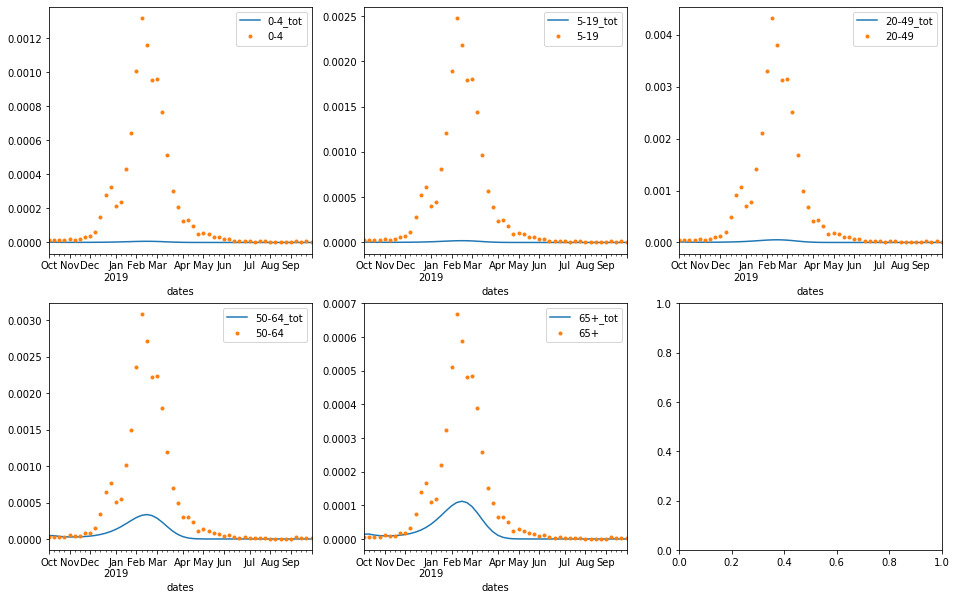

In [8]:
res_mdl = model.run_model([0.00055]+[0.000435]*2+[0.0055,0.0055],0.082*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['US'])




# plotting the data and model
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl,dates_19,2019)
model.plot_calibrated_model(tx_19,calibrate_mdl_19)

## Calibration by season

### 2015

minimized value: -15.079886686487715
fitted parameters: Beta=[0.00262058 0.00149463 0.00292541 0.00211808], Phi=44.68275447248393
num of sampling the target function: 174
MSE: 2.8241543212434476e-07


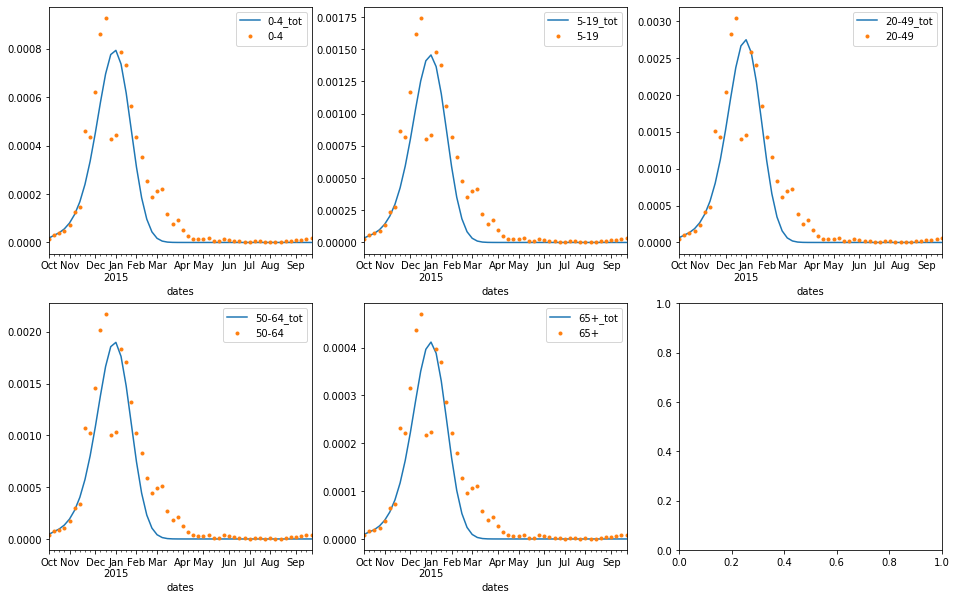

In [9]:
#fitting season 2015:
# Model Fitting
p0=(0.0027,0.00162,0.003,0.002,0.075) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.003,0.017))# boundries for variables
res_fit_15= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_15,tx_15,'Texas',2015)
                           ,options={'maxiter':1000})

fitted_params_15 = res_fit_15.x

# run the fitted model:
fitted_beta_15 = np.array([fitted_params_15[0],fitted_params_15[1],fitted_params_15[1],fitted_params_15[2],
                           fitted_params_15[3]])
fitted_phi_15 = fitted_params_15[4]
res_mdl_15 = model.run_model(fitted_beta_15,fitted_phi_15*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_15)
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl_15,dates_15,2015)
model.plot_calibrated_model(tx_15,calibrate_mdl_15)

### 2016

minimized value: -17.24584361306505
fitted parameters: Beta=[0.00262662 0.00147975 0.00284582 0.00218321], Phi=97.25674296428322
num of sampling the target function: 170
MSE: 3.237615593315684e-08


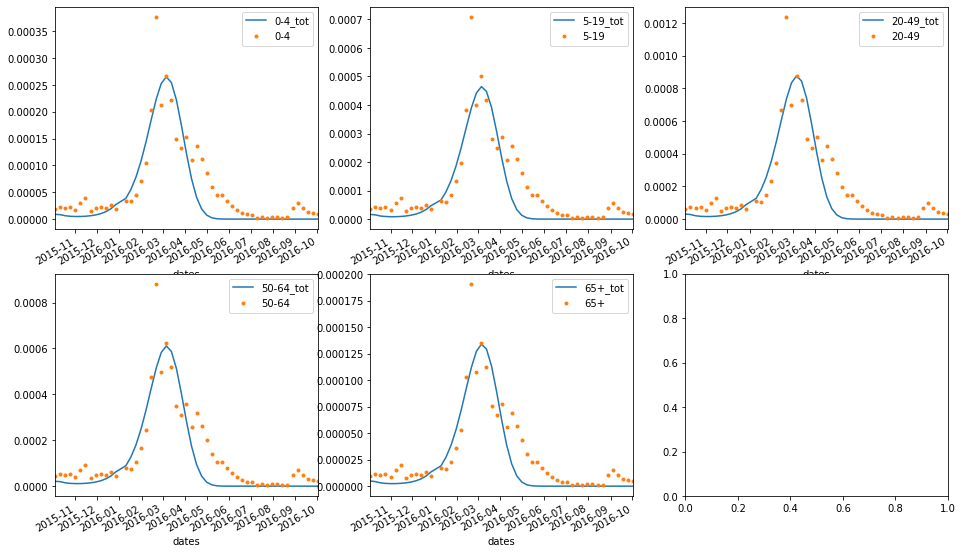

In [10]:
#fitting season 2016:
# Model Fitting
p0=(0.00265,0.00145,0.00295,0.00195,0.0105) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_16= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_16,tx_16,'Texas',2016)
                           ,options={'maxiter':2000})

fitted_params_16 = res_fit_16.x

# run the fitted model:
fitted_beta_16 = np.array([fitted_params_16[0],fitted_params_16[1],fitted_params_16[1],fitted_params_16[2],
                           fitted_params_16[3]])
fitted_phi_16 = fitted_params_16[4]
res_mdl_16 = model.run_model(fitted_beta_16,fitted_phi_16*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_16)
calibrate_mdl_16 = model.model_infected_symp_cases(res_mdl_16,dates_16,2016)
model.plot_calibrated_model(tx_16,calibrate_mdl_16)

### 2017

minimized value: -16.537182508075663
fitted parameters: Beta=[0.00276461 0.00150158 0.00295575 0.00214033], Phi=87.09124636746569
num of sampling the target function: 61
MSE: 6.576470714581925e-08


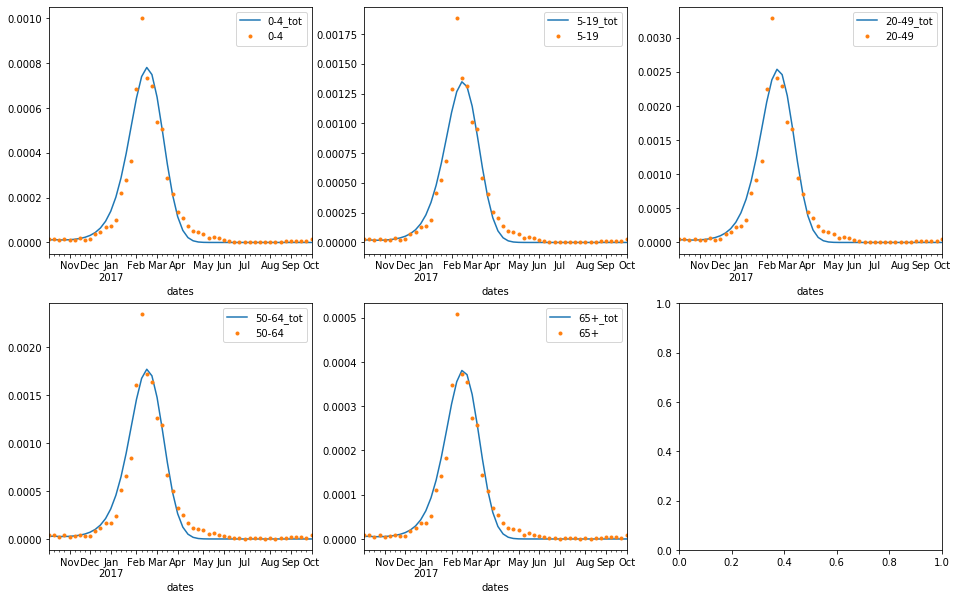

In [11]:
#fitting season 2017:
# Model Fitting
p0=(0.0026,0.001525,0.0029,0.0019,0.0092) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_17= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_17,tx_17,'Texas',2017)
                           ,options={'maxiter':1000})

fitted_params_17 = res_fit_17.x

# run the fitted model:
fitted_beta_17 = np.array([fitted_params_17[0],fitted_params_17[1],fitted_params_17[1],fitted_params_17[2],
                           fitted_params_17[3]])
fitted_phi_17 = fitted_params_17[4]
res_mdl_17 = model.run_model(fitted_beta_17,fitted_phi_17*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_17)
calibrate_mdl_17 = model.model_infected_symp_cases(res_mdl_17,dates_17,2017)
model.plot_calibrated_model(tx_17,calibrate_mdl_17)

### 2018

minimized value: -14.467355604395319
fitted parameters: Beta=[0.00286868 0.00156296 0.0031912  0.00215884], Phi=73.07925502095546
num of sampling the target function: 118
MSE: 5.210834660906864e-07


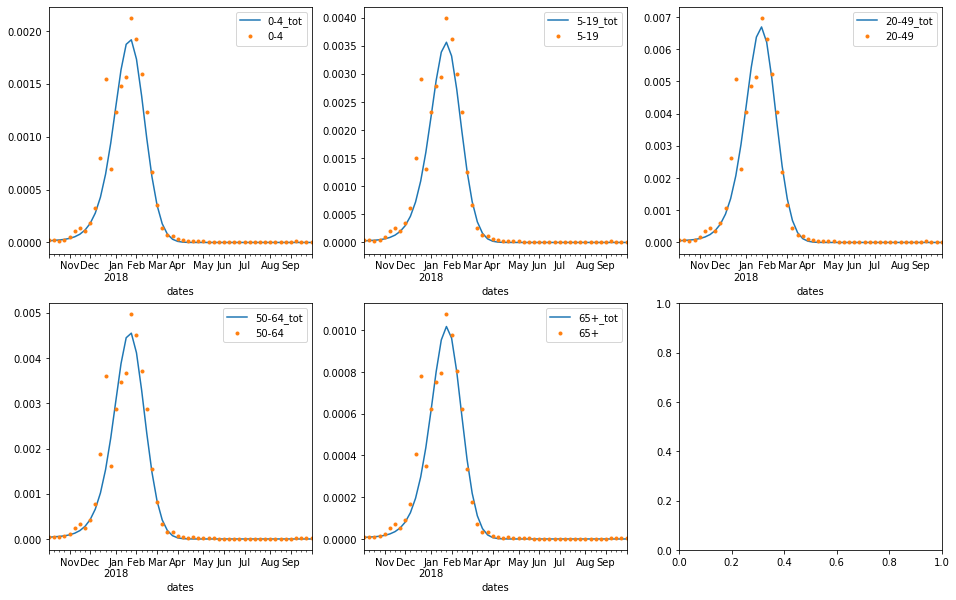

In [12]:
#fitting season 2018:
# Model Fitting
p0=(0.0029,0.00162,0.0029,0.0023,0.0075) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_18= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_18,tx_18,'Texas',2018)
                           ,options={'maxiter':1000})

fitted_params_18 = res_fit_18.x

# run the fitted model:
fitted_beta_18 = np.array([fitted_params_18[0],fitted_params_18[1],fitted_params_18[1],fitted_params_18[2],
                        fitted_params_18[3]])
fitted_phi_18 = fitted_params_18[4]
res_mdl_18 = model.run_model(fitted_beta_18,fitted_phi_18*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_18)
calibrate_mdl_18 = model.model_infected_symp_cases(res_mdl_18,dates_18,2018)
model.plot_calibrated_model(tx_18,calibrate_mdl_18)

### 2019

minimized value: -16.20108137168444
fitted parameters: Beta=[0.00283956 0.00153519 0.00306662 0.00216384], Phi=88.57267391761093
num of sampling the target function: 222
MSE: 9.203642892600496e-08


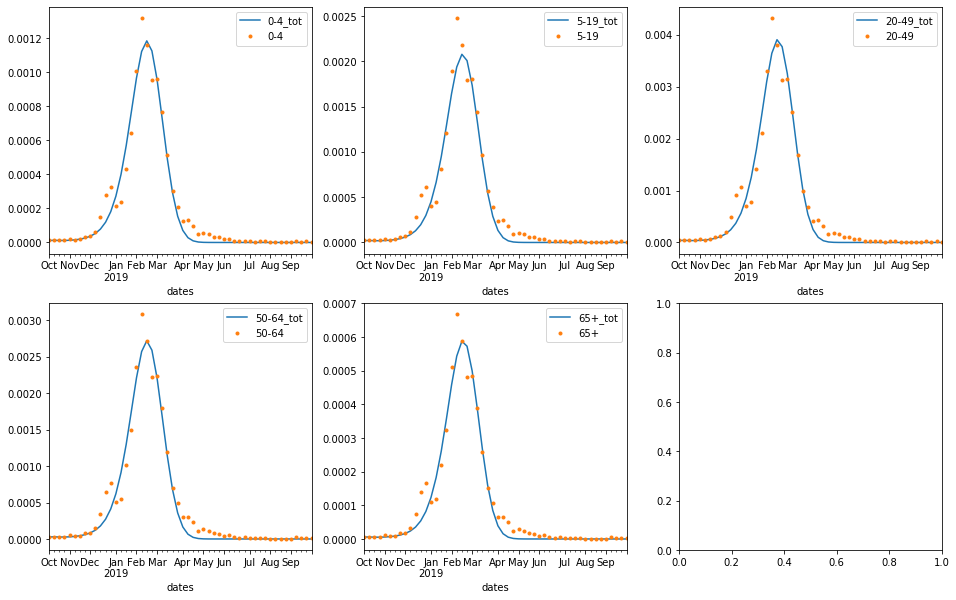

In [16]:
#fitting season 2019:
# Model Fitting
p0=(0.0055,0.0043,0.0055,0.0055,0.081) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.02))# boundries for variables
res_fit_19= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_19,tx_19,'Texas',2019)
                           ,options={'maxiter':1000})

fitted_params_19 = res_fit_19.x

# run the fitted model:
fitted_beta_19 = np.array([fitted_params_19[0],fitted_params_19[1],fitted_params_19[1],fitted_params_19[2],
                        fitted_params_19[3]])
fitted_phi_19 = fitted_params_19[4]
res_mdl_19 = model.run_model(fitted_beta_19,fitted_phi_19*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_19)
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl_19,dates_19,2019)
model.plot_calibrated_model(tx_19,calibrate_mdl_19)

In [14]:
## Data with each year vaccination rate:
#loading vaccination coverage
with open('./model_data/tx_vaccinatio_coverage.pickle', 'rb') as pickle_in:
    tx_vacc_coverage = pickle.load(pickle_in)

MSE: 4.0508169043195145e-07


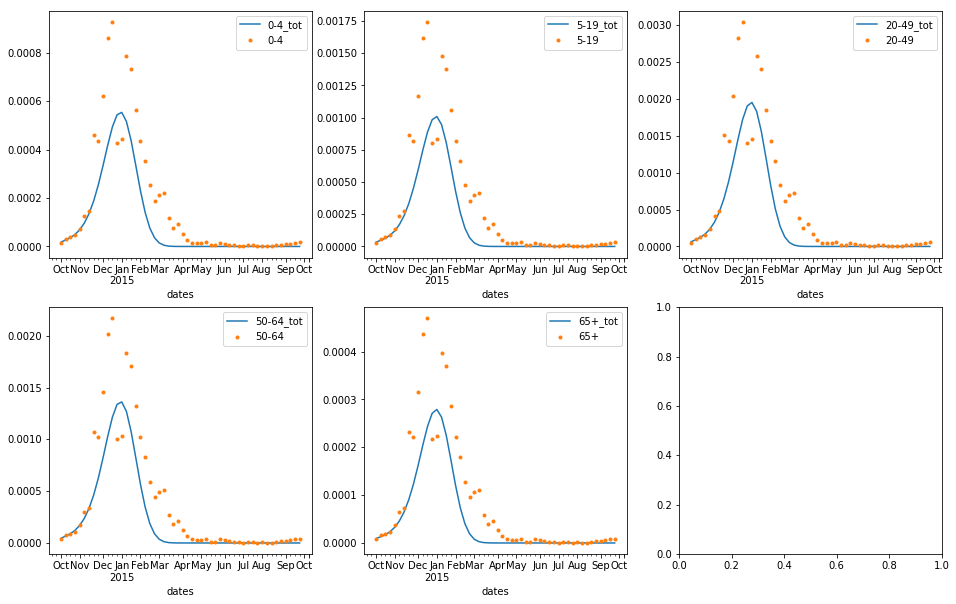

In [14]:
#2015
res_mdl_15 = model.run_model(fitted_beta_15,fitted_phi_15*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage= tx_vacc_coverage['Texas'][2015])

# plotting the data and model
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl_15,dates_15,2015)
model.plot_calibrated_model(tx_15,calibrate_mdl_15)

MSE: 4.7163049128193344e-08


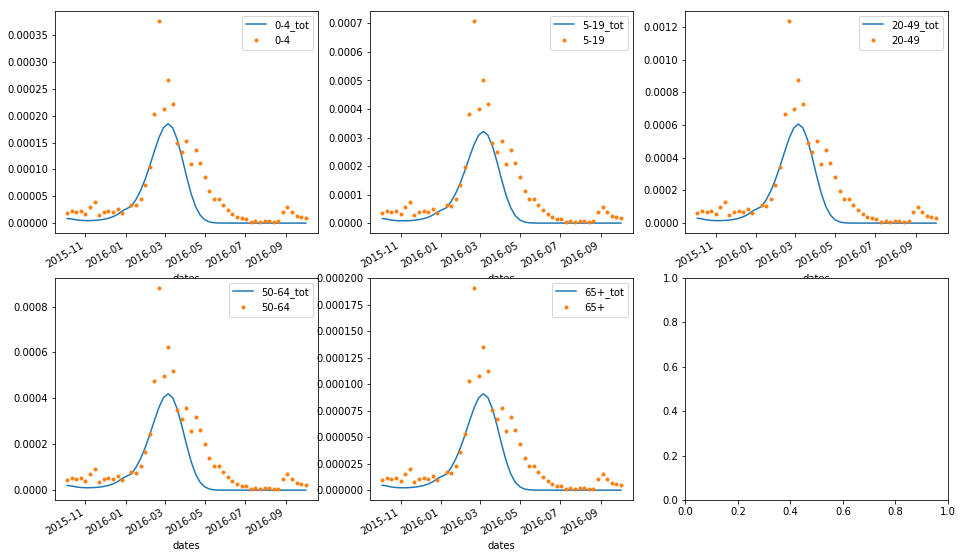

In [15]:
# 2016
res_mdl_16 = model.run_model(fitted_beta_16,fitted_phi_16*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage=tx_vacc_coverage['Texas'][2016])

# plotting the data and model
calibrate_mdl_16 = model.model_infected_symp_cases(res_mdl_16,dates_16,2016)
model.plot_calibrated_model(tx_16,calibrate_mdl_16)

MSE: 1.5206409316592645e-07


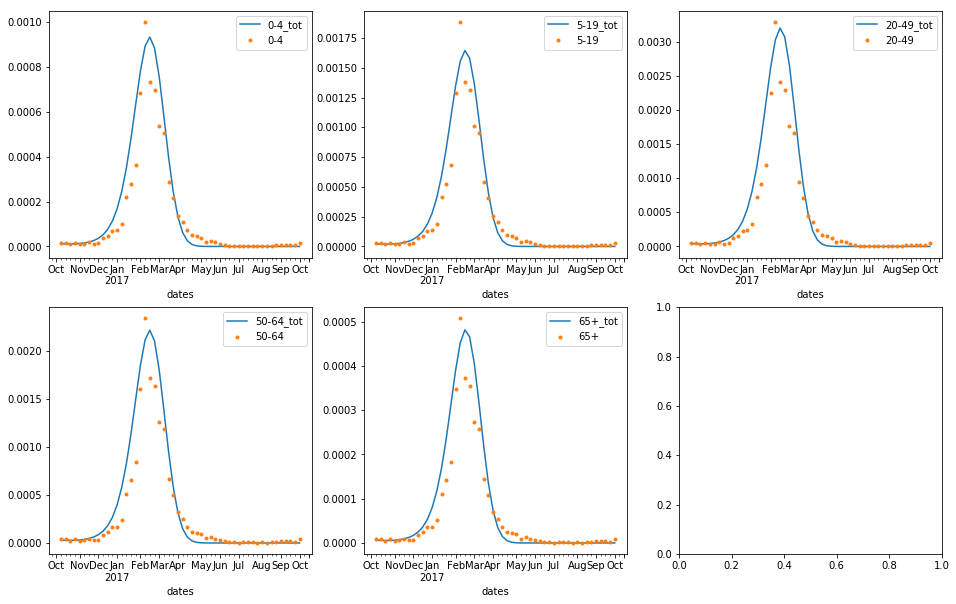

In [16]:
#2017
res_mdl_17 = model.run_model(fitted_beta_17,fitted_phi_17*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage= tx_vacc_coverage['Texas'][2017])

# plotting the data and model
calibrate_mdl_17 = model.model_infected_symp_cases(res_mdl_17,dates_17,2017)
model.plot_calibrated_model(tx_17,calibrate_mdl_17)

MSE: 3.124740616723706e-06


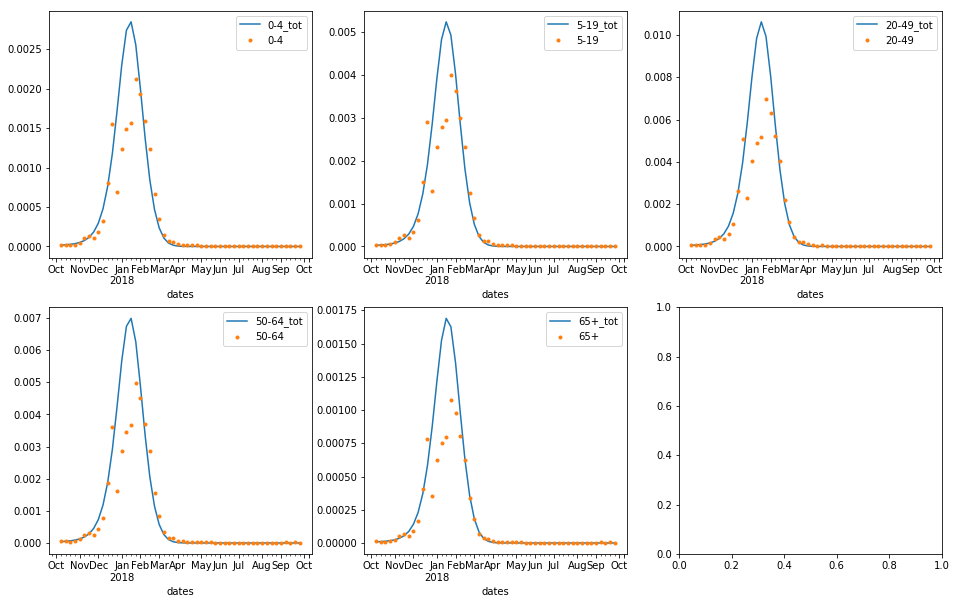

In [17]:
#2018
res_mdl_18 = model.run_model(fitted_beta_18,fitted_phi_18*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=tx_vacc_coverage['Texas'][2018])

# plotting the data and model
calibrate_mdl_18 = model.model_infected_symp_cases(res_mdl_18,dates_18,2018)
model.plot_calibrated_model(tx_18,calibrate_mdl_18)

MSE: 1.0656330015607853e-07


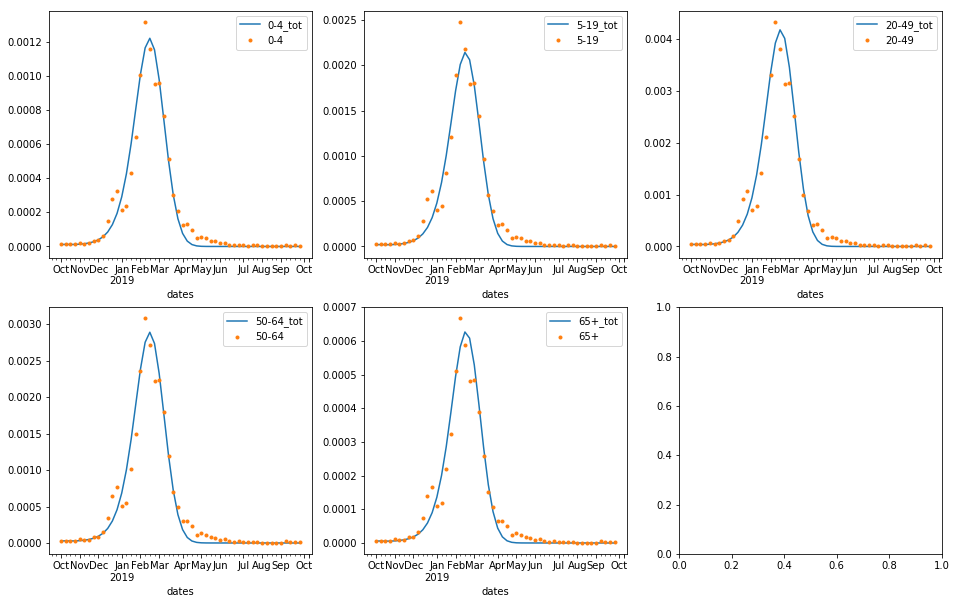

In [18]:
#2019
res_mdl_19 = model.run_model(fitted_beta_19,fitted_phi_19*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=tx_vacc_coverage['Texas'][2019] )

# plotting the data and model
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl_19,dates_19,2019)
model.plot_calibrated_model(tx_19,calibrate_mdl_19)

MSE: 2.825702586545188e-07


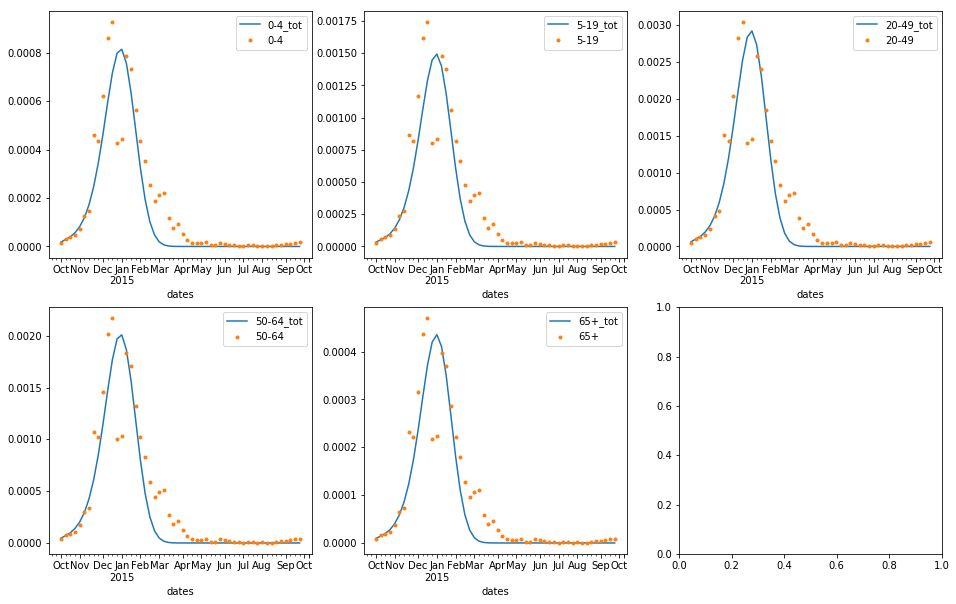

In [19]:
#2015
res_mdl_15 = model.run_model(fitted_beta_15,fitted_phi_15*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage= model.vaccination_coverage['Texas'])

# plotting the data and model
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl_15,dates_15,2015)
model.plot_calibrated_model(tx_15,calibrate_mdl_15)

MSE: 3.358953006358905e-08


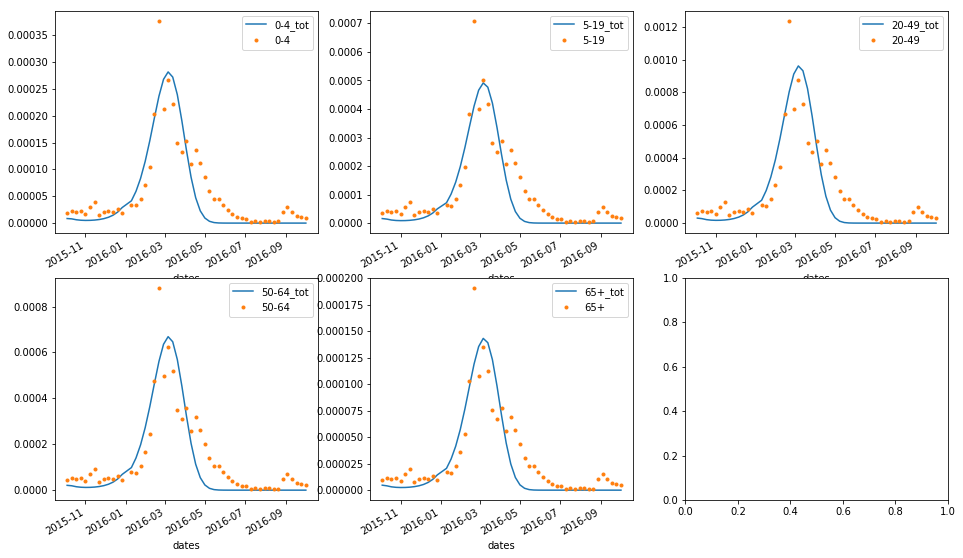

In [20]:
# 2016
res_mdl_16 = model.run_model(fitted_beta_16,fitted_phi_16*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['Texas'])

# plotting the data and model
calibrate_mdl_16 = model.model_infected_symp_cases(res_mdl_16,dates_16,2016)
model.plot_calibrated_model(tx_16,calibrate_mdl_16)

MSE: 7.588976070569159e-08


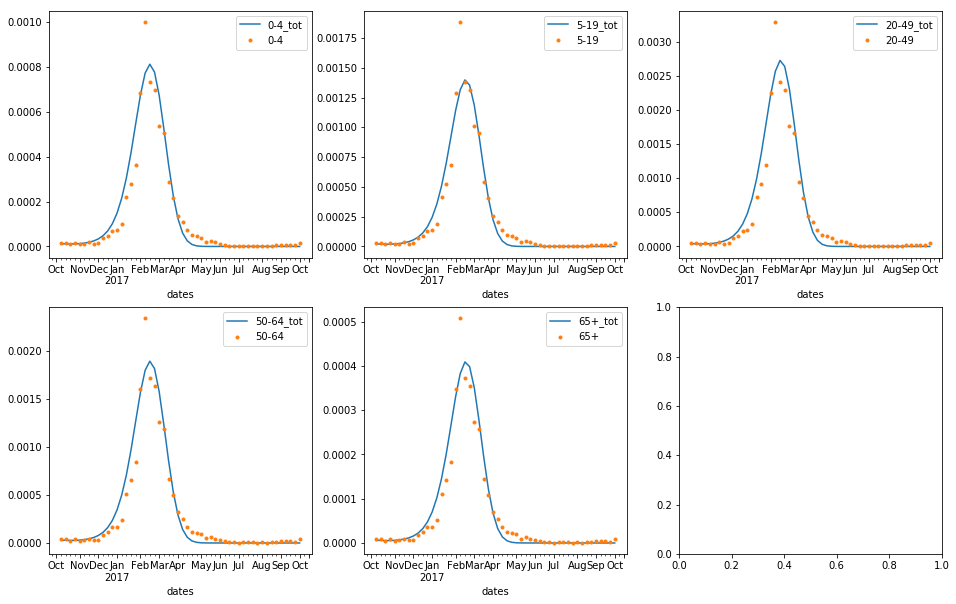

In [21]:
#2017
res_mdl_17 = model.run_model(fitted_beta_17,fitted_phi_17*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage= model.vaccination_coverage['Texas'])

# plotting the data and model
calibrate_mdl_17 = model.model_infected_symp_cases(res_mdl_17,dates_17,2017)
model.plot_calibrated_model(tx_17,calibrate_mdl_17)

MSE: 5.349877137601409e-07


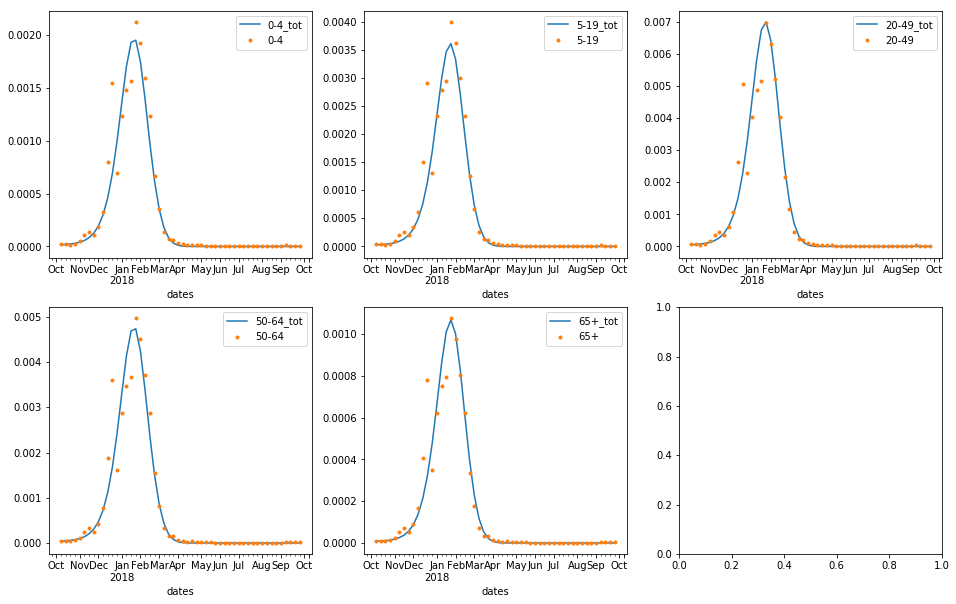

In [22]:
#2018
res_mdl_18 = model.run_model(fitted_beta_18,fitted_phi_18*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage= model.vaccination_coverage['Texas'])

# plotting the data and model
calibrate_mdl_18 = model.model_infected_symp_cases(res_mdl_18,dates_18,2018)
model.plot_calibrated_model(tx_18,calibrate_mdl_18)

MSE: 1.0656330015607853e-07


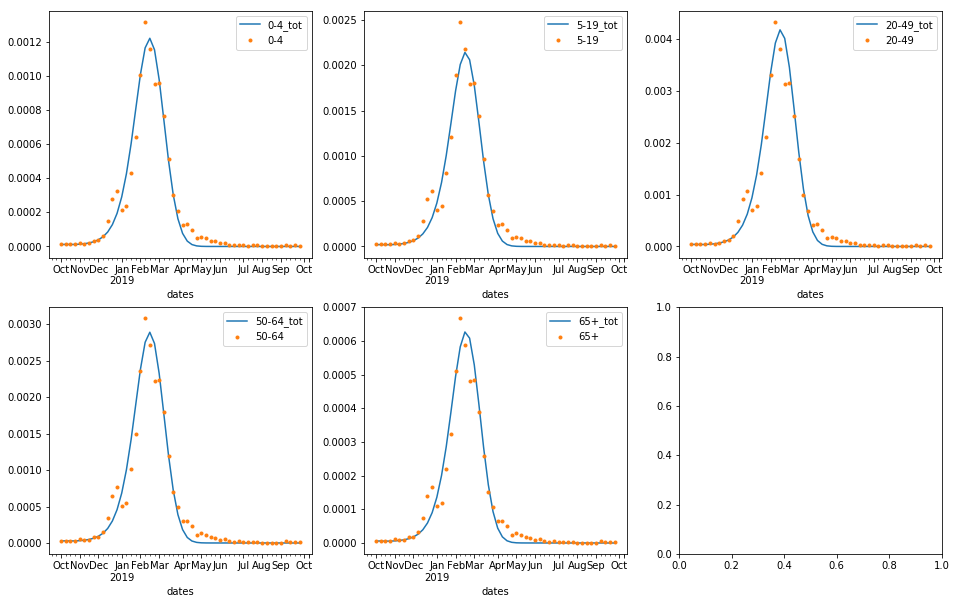

In [23]:
#2019
res_mdl_19 = model.run_model(fitted_beta_19,fitted_phi_19*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=model.vaccination_coverage['Texas'] )

# plotting the data and model
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl_19,dates_19,2019)
model.plot_calibrated_model(tx_19,calibrate_mdl_19)

# Saving calibration data

In [17]:
# Saving fitted parameters for TX
TX_fitted_params = {}
TX_fitted_params['2015'] = {'beta': fitted_beta_15, 'phi': fitted_phi_15}
TX_fitted_params['2016'] = {'beta': fitted_beta_16, 'phi': fitted_phi_16}
TX_fitted_params['2017'] = {'beta': fitted_beta_17, 'phi': fitted_phi_17}
TX_fitted_params['2018'] = {'beta': fitted_beta_18, 'phi': fitted_phi_18}
TX_fitted_params['2019'] = {'beta': fitted_beta_19, 'phi': fitted_phi_19}

with open('./model_data/TX_fitted_parameters.pickle', 'wb') as handle:
    pickle.dump(TX_fitted_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
# Getting the attack rate for each age group, model and data
df_model_AR_tx = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_AR_15 = model.model_attack_rate(calibrate_mdl_15,'Texas')
mdl_AR_15['season'] = 2015

mdl_AR_16 = model.model_attack_rate(calibrate_mdl_16,'Texas')
mdl_AR_16['season'] = 2016

mdl_AR_17 = model.model_attack_rate(calibrate_mdl_17,'Texas')
mdl_AR_17['season'] = 2017

mdl_AR_18 = model.model_attack_rate(calibrate_mdl_18,'Texas')
mdl_AR_18['season'] = 2018

mdl_AR_19 = model.model_attack_rate(calibrate_mdl_19,'Texas')
mdl_AR_19['season'] = 2019

for mdl_AR in [mdl_AR_15,mdl_AR_16,mdl_AR_17,mdl_AR_18,mdl_AR_19]:
    df_model_AR_tx = df_model_AR_tx.append(mdl_AR, ignore_index=True)

with open('./model_data/TX_model_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_model_AR_tx, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
# Getting the attack rate for each age group, model and data
df_data_AR_tx = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_AR_15 = model.get_data_attack_rate(tx_15,'Texas')
dt_AR_15['season'] = 2015

dt_AR_16 = model.get_data_attack_rate(tx_16,'Texas')
dt_AR_16['season'] = 2016

dt_AR_17 = model.get_data_attack_rate(tx_17,'Texas')
dt_AR_17['season'] = 2017

dt_AR_18 = model.get_data_attack_rate(tx_18,'Texas')
dt_AR_18['season'] = 2018

dt_AR_19 = model.get_data_attack_rate(tx_19,'Texas')
dt_AR_19['season'] = 2019

for dt_AR in [dt_AR_15,dt_AR_16,dt_AR_17,dt_AR_18,dt_AR_19]:
    df_data_AR_tx = df_data_AR_tx.append(dt_AR, ignore_index=True)

with open('./model_data/TX_data_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_data_AR_tx, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
# Proportion Model
# Getting the attack rate for each age group, model and data
df_model_AR_tx = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_AR_15 = model.model_proportion(calibrate_mdl_15)
mdl_AR_15['season'] = 2015

mdl_AR_16 = model.model_proportion(calibrate_mdl_16)
mdl_AR_16['season'] = 2016

mdl_AR_17 = model.model_proportion(calibrate_mdl_17)
mdl_AR_17['season'] = 2017

mdl_AR_18 = model.model_proportion(calibrate_mdl_18)
mdl_AR_18['season'] = 2018

mdl_AR_19 = model.model_proportion(calibrate_mdl_19)
mdl_AR_19['season'] = 2019

for mdl_AR in [mdl_AR_15,mdl_AR_16,mdl_AR_17,mdl_AR_18,mdl_AR_19]:
    df_model_AR_tx = df_model_AR_tx.append(mdl_AR, ignore_index=True)

with open('./model_data/TX_model_proportion.pickle', 'wb') as handle:
    pickle.dump(df_model_AR_tx, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
# Proportion Data

df_data_AR_tx = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_AR_15 = model.get_data_proportion(tx_15)
dt_AR_15['season'] = 2015

dt_AR_16 = model.get_data_proportion(tx_16)
dt_AR_16['season'] = 2016

dt_AR_17 = model.get_data_proportion(tx_17)
dt_AR_17['season'] = 2017

dt_AR_18 = model.get_data_proportion(tx_18)
dt_AR_18['season'] = 2018

dt_AR_19 = model.get_data_proportion(tx_19)
dt_AR_19['season'] = 2019

for dt_AR in [dt_AR_15,dt_AR_16,dt_AR_17,dt_AR_18,dt_AR_19]:
    df_data_AR_tx = df_data_AR_tx.append(dt_AR, ignore_index=True)

with open('./model_data/TX_data_proportion.pickle', 'wb') as handle:
    pickle.dump(df_data_AR_tx, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
# Getting data for fitting figure:
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_16)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_17)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_18)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_19)

with open('./model_data/TX_mdl_fitting_res.pickle', 'wb') as handle:
    pickle.dump(calibrate_mdl_15, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [23]:
# Getting data for fitting figure:
tx_15 = tx_15.append(tx_16)
tx_15 = tx_15.append(tx_17)
tx_15 = tx_15.append(tx_18)
tx_15 = tx_15.append(tx_19)

with open('./model_data/TX_data_fitting_res.pickle', 'wb') as handle:
    pickle.dump(tx_15, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Tests

ValueError: operands could not be broadcast together with shapes (260,) (52,) 

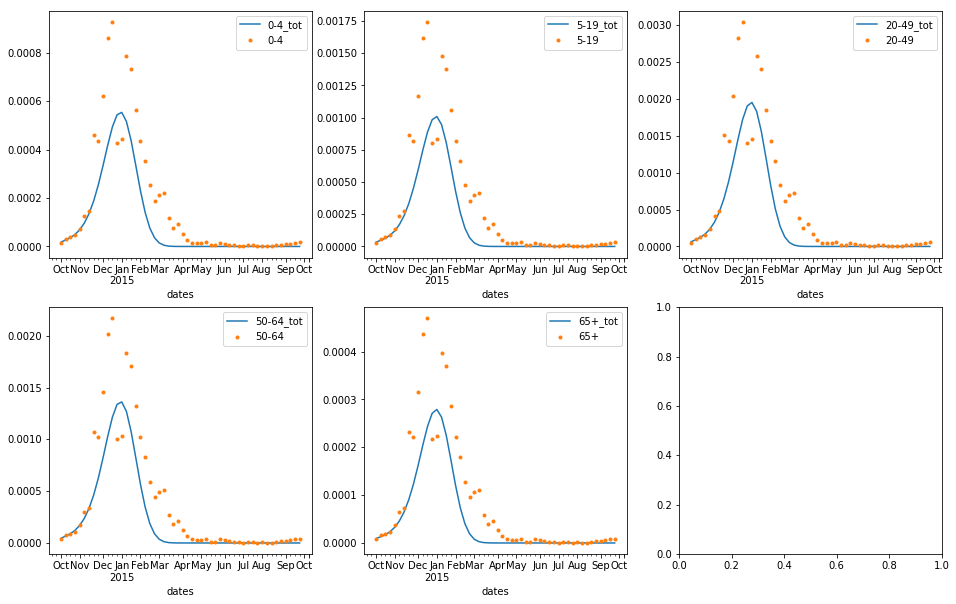

In [31]:
#2015
res_mdl_15 = model.run_model(fitted_beta_15,fitted_phi_15*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage= tx_vacc_coverage['Texas'][2015])

# plotting the data and model
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl_15,dates_15,2015)
model.plot_calibrated_model(tx_15,calibrate_mdl_15)

In [ ]:
# 2016
res_mdl_16 = model.run_model(fitted_beta_16,fitted_phi_16*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage=tx_vacc_coverage['Texas'][2016])

# plotting the data and model
calibrate_mdl_16 = model.model_infected_symp_cases(res_mdl_16,dates_16,2016)
model.plot_calibrated_model(tx_16,calibrate_mdl_16)

In [ ]:
#2017
res_mdl_17 = model.run_model(fitted_beta_17,fitted_phi_17*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Texas'],
                vaccination_coverage= tx_vacc_coverage['Texas'][2017])

# plotting the data and model
calibrate_mdl_17 = model.model_infected_symp_cases(res_mdl_17,dates_17,2017)
model.plot_calibrated_model(tx_17,calibrate_mdl_17)

In [ ]:
#2018
res_mdl_18 = model.run_model(fitted_beta_18,fitted_phi_18*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=tx_vacc_coverage['Texas'][2018])

# plotting the data and model
calibrate_mdl_18 = model.model_infected_symp_cases(res_mdl_18,dates_18,2018)
model.plot_calibrated_model(tx_18,calibrate_mdl_18)

In [ ]:
#2019
res_mdl_19 = model.run_model(fitted_beta_19,fitted_phi_19*10**(4),1e-4,1e-4,population_size=model.population_size['Texas'],
                vaccination_coverage=tx_vacc_coverage['Texas'][2019] )

# plotting the data and model
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl_19,dates_19,2019)
model.plot_calibrated_model(tx_19,calibrate_mdl_19)